In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import constants as cts

## Utils

In [9]:
def export_chart(df: pd.DataFrame, chart_name: str):
    final_path: str = f"{cts.CHARTS_EXPORTS_DIRECTORY_PATH}/{chart_name}"
    df.to_csv(f"{final_path}.csv", index=False)
    plt.savefig(f"{final_path}.png")
    print(f"[{chart_name}] data:\n{df}\n")

def update_mean(df: pd.DataFrame) -> pd.DataFrame:
    df[cts.Metrics.MEAN_KWH.value] = (
        df[cts.Metrics.TOTAL_KWH.value] / df[cts.Metrics.CHARGING_SESSIONS.value]
    )
    return df

## Month level overview

In [10]:
def plot_monthly_overview(df: pd.DataFrame, driver: str, year: int):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(
        df[cts.MONTH_COLUMN],
        df[cts.Metrics.CHARGING_SESSIONS.value],
        color="blue",
        alpha=0.7,
        label=cts.Metrics.CHARGING_SESSIONS.value,
        width=0.4,
    )
    ax1.set_ylabel(cts.Metrics.CHARGING_SESSIONS.value, color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(
        df[cts.MONTH_COLUMN],
        df[cts.Metrics.TOTAL_KWH.value],
        color="green",
        marker="o",
        label=cts.Metrics.TOTAL_KWH.value,
    )
    ax2.plot(
        df[cts.MONTH_COLUMN],
        df[cts.Metrics.MEAN_KWH.value],
        color="orange",
        marker="x",
        label=cts.Metrics.MEAN_KWH.value,
    )
    ax2.set_ylabel(
        f"{cts.Metrics.TOTAL_KWH.value} & {cts.Metrics.MEAN_KWH.value}", color="black"
    )
    ax2.tick_params(axis="y", labelcolor="black")
    ax2.legend(loc="upper right")

    ax1.set(xlabel="Month")
    ax1.legend(loc="upper left")

    fig.suptitle(f"Metrics for [{driver}] in [{year}]")
    export_chart(df, f"monthly_{year}_{driver}")
    plt.show()

In [11]:
def get_all_fleet_df(year_df: pd.DataFrame) -> pd.DataFrame:
    month_fleet_df = (
        year_df.groupby([cts.MONTH_COLUMN])
        .agg(cts.STANDARD_AGGREGATION_DICT)
        .reset_index()
    )
    return update_mean(month_fleet_df)

[monthly_2021_Driver 5] data:
      driver  month  year  Charging Sessions  Total kWh   Mean kWh
23  Driver 5      1  2021                  4    152.780  38.195000
24  Driver 5      2  2021                  4    115.200  28.800000
25  Driver 5      3  2021                  3    114.670  38.223333
26  Driver 5      4  2021                  6    239.660  39.943333
27  Driver 5      5  2021                  6    171.882  28.647000
28  Driver 5      6  2021                 15    190.219  12.681267
29  Driver 5      7  2021                 21    183.550   8.740476
30  Driver 5      8  2021                  6     47.180   7.863333
31  Driver 5     10  2021                  1     44.570  44.570000
32  Driver 5     11  2021                  6    187.648  31.274667
33  Driver 5     12  2021                  8    287.640  35.955000



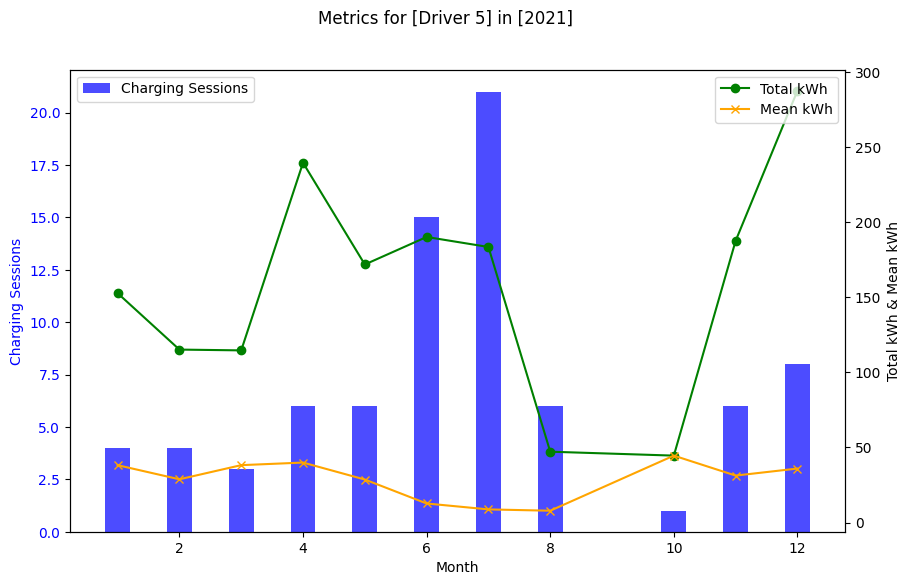

[monthly_2021_Driver 2] data:
      driver  month  year  Charging Sessions  Total kWh   Mean kWh
12  Driver 2      1  2021                  5     160.00  32.000000
13  Driver 2      2  2021                  4      91.10  22.775000
14  Driver 2      3  2021                  3      44.94  14.980000
15  Driver 2      4  2021                 12     244.50  20.375000
16  Driver 2      5  2021                  8     162.94  20.367500
17  Driver 2      6  2021                  7     120.27  17.181429
18  Driver 2      7  2021                  2      69.67  34.835000
19  Driver 2      9  2021                  3      60.23  20.076667
20  Driver 2     10  2021                  7     180.64  25.805714
21  Driver 2     11  2021                  9     215.66  23.962222
22  Driver 2     12  2021                 14     264.33  18.880714



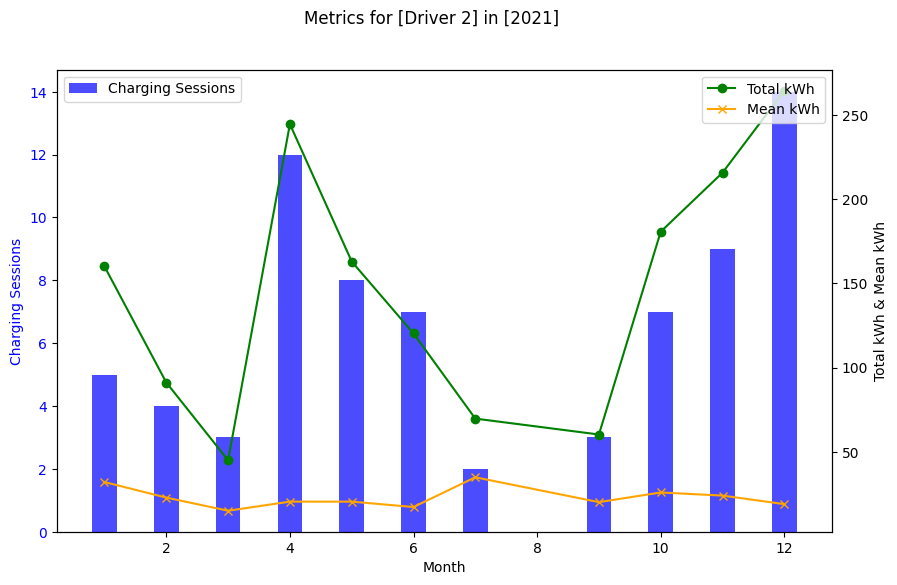

[monthly_2021_Driver 1] data:
      driver  month  year  Charging Sessions  Total kWh   Mean kWh
0   Driver 1      1  2021                  8    402.700  50.337500
1   Driver 1      2  2021                  8    327.600  40.950000
2   Driver 1      3  2021                 14    430.880  30.777143
3   Driver 1      4  2021                 14    527.000  37.642857
4   Driver 1      5  2021                 10    423.360  42.336000
5   Driver 1      6  2021                 17    483.454  28.438471
6   Driver 1      7  2021                 14    492.588  35.184857
7   Driver 1      8  2021                  5    197.010  39.402000
8   Driver 1      9  2021                  4    155.490  38.872500
9   Driver 1     10  2021                 10    366.456  36.645600
10  Driver 1     11  2021                 14    478.096  34.149714
11  Driver 1     12  2021                  9    358.270  39.807778



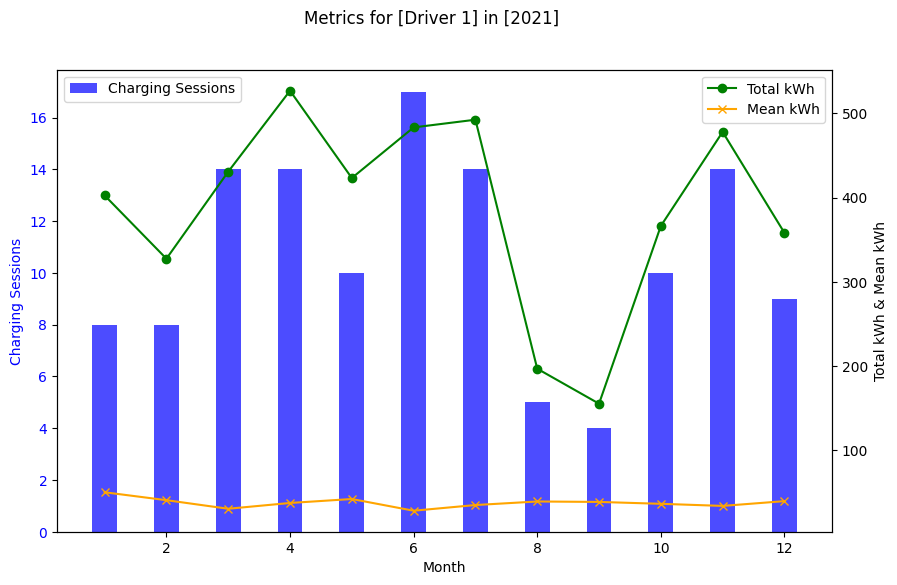

[monthly_2021_All fleet] data:
    month  Charging Sessions  Metrics.TOTAL_KWH   Mean kWh
0       1                 17            715.480  42.087059
1       2                 16            533.900  33.368750
2       3                 20            590.490  29.524500
3       4                 32           1011.160  31.598750
4       5                 24            758.182  31.590917
5       6                 39            793.943  20.357513
6       7                 37            745.808  20.156973
7       8                 11            244.190  22.199091
8       9                  7            215.720  30.817143
9      10                 18            591.666  32.870333
10     11                 29            881.404  30.393241
11     12                 31            910.240  29.362581



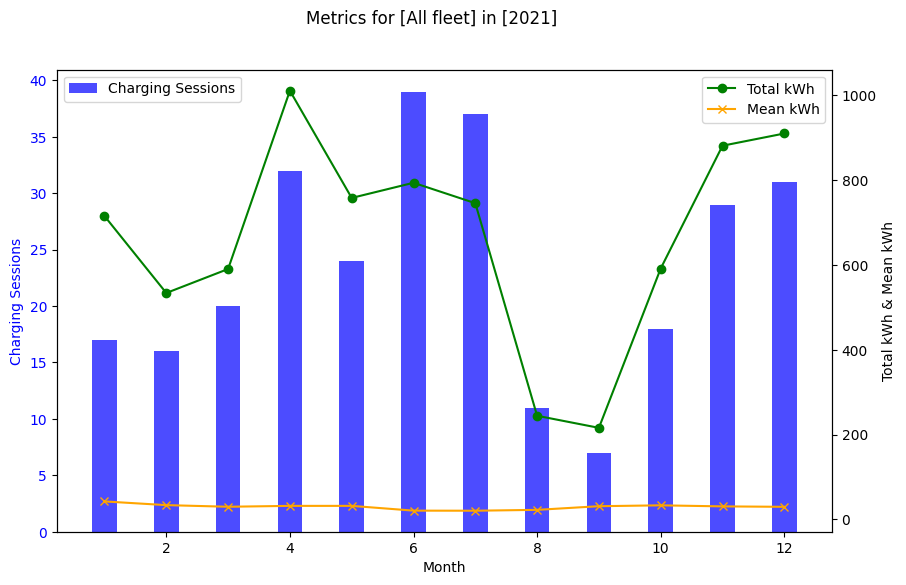

In [12]:
monthly_results_df = pd.read_csv(cts.MONTHLY_RESULTS_FILE_PATH)

years: set[int] = set(monthly_results_df[cts.YEAR_COLUMN])
drivers: set[str] = set(monthly_results_df[cts.DRIVER_COLUMN])

for year in years:
    year_df = monthly_results_df[monthly_results_df[cts.YEAR_COLUMN] == year]

    # for each driver
    for driver_name in drivers:
        driver_year_df: pd.DataFrame = year_df[
            year_df[cts.DRIVER_COLUMN] == driver_name
        ]
        plot_monthly_overview(driver_year_df, driver_name, year)

    # for all fleet
    plot_monthly_overview(get_all_fleet_df(year_df), "All fleet", year)

## Year level overview

In [13]:
def plot_yearly_overview(df: pd.DataFrame, year: int):
    df: pd.DataFrame = df[df[cts.YEAR_COLUMN] == year]

    df = df.drop(columns=[cts.YEAR_COLUMN, cts.Metrics.MEAN_KWH.value], errors="ignore")
    columns_to_sum = [cts.Metrics.CHARGING_SESSIONS.value, cts.Metrics.TOTAL_KWH.value]
    df.loc[len(df)] = ["All fleet"] + df[columns_to_sum].sum().tolist()
    df = update_mean(df)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].bar(
        df[cts.DRIVER_COLUMN], df[cts.Metrics.CHARGING_SESSIONS.value], color="blue"
    )
    axs[0].set_title(cts.Metrics.CHARGING_SESSIONS.value)
    axs[0].set_ylabel(cts.Metrics.CHARGING_SESSIONS.value)

    axs[1].bar(df[cts.DRIVER_COLUMN], df[cts.Metrics.TOTAL_KWH.value], color="green")
    axs[1].set_title(cts.Metrics.TOTAL_KWH.value)
    axs[1].set_ylabel(cts.Metrics.TOTAL_KWH.value)

    axs[2].bar(df[cts.DRIVER_COLUMN], df[cts.Metrics.MEAN_KWH.value], color="orange")
    axs[2].set_title(cts.Metrics.MEAN_KWH.value)
    axs[2].set_ylabel(cts.Metrics.MEAN_KWH.value)

    fig.suptitle(f"Metrics for [{year}]")

    plt.tight_layout()
    export_chart(df, f"yearly_{year}")
    plt.show()

[yearly_2021] data:
      driver  Charging Sessions  Total kWh   Mean kWh
0   Driver 1              127.0   4642.904  36.558299
1   Driver 2               74.0   1614.280  21.814595
2   Driver 5               80.0   1734.999  21.687487
3  All fleet              281.0   7992.183  28.441932



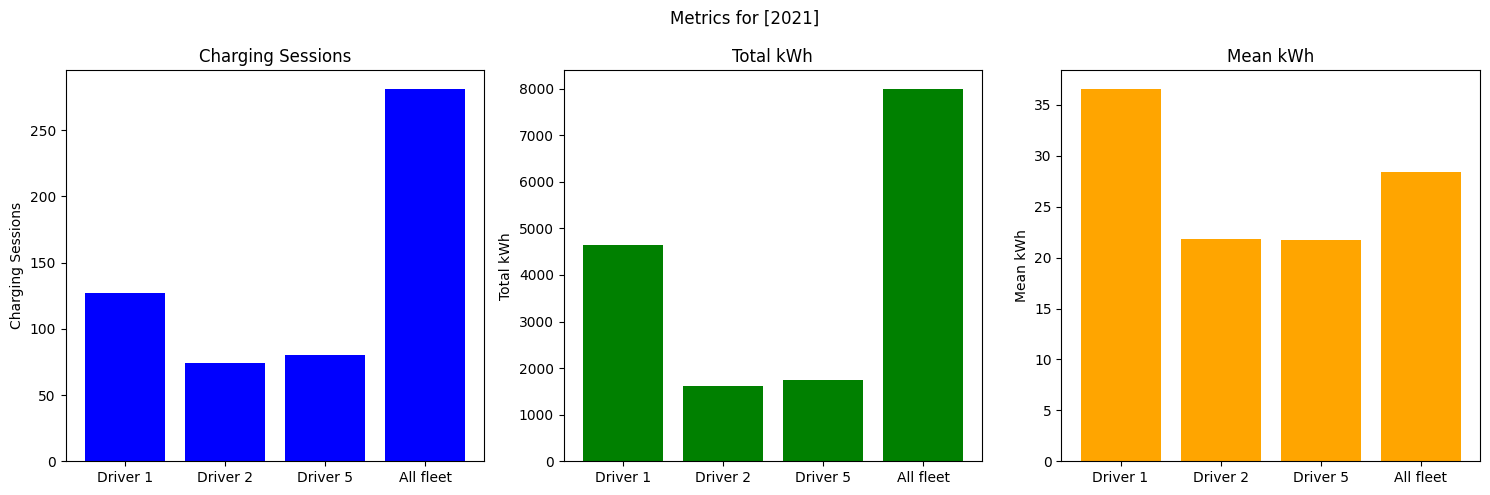

In [14]:
yearly_results_df = pd.read_csv(cts.YEARLY_RESULTS_FILE_PATH)
yearly_results_df
years: set[int] = set(monthly_results_df[cts.YEAR_COLUMN])
for year in years:
    plot_yearly_overview(yearly_results_df, year)